An example of using SeaFreeze to generate thermodynamic properties for aqueous NaCl up to 1,000 MPa

In [8]:
import numpy as np
from seafreeze import seafreeze as sf
from tabulate import tabulate
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

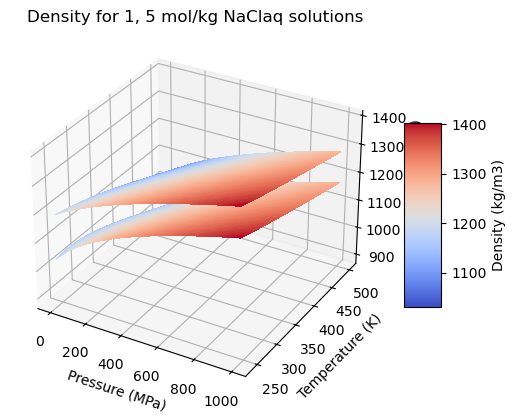

In [12]:
P = np.arange(0.1, 1000.2, 10)
T = np.arange(240, 501, 2)
PTm1 = np.array([P, T, 5], dtype = object)
PTm2 = np.array([P, T, 1], dtype = object)

# do calc
out1 = sf.getProp(PTm1, 'NaClaq')
out2 = sf.getProp(PTm2, 'NaClaq')

# modify output for plotting
P, T = np.meshgrid(P, T)
rho1 = ((np.squeeze(out1.rho, axis=2)).transpose())
rho2 = ((np.squeeze(out2.rho, axis=2)).transpose())

# Density surface
fig1, ax1 = plt.subplots(subplot_kw={"projection": "3d"})
surf1 = ax1.plot_surface(P, T, rho1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
surf2 = ax1.plot_surface(P, T, rho2, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax1.set_title("Density for 1, 5 mol/kg NaClaq solutions")
ax1.set_xlabel('Pressure (MPa)')
ax1.set_ylabel('Temperature (K)')
ax1.set_zlabel('Density (kg/m^3)')
cbar1 = fig1.colorbar(surf1, shrink=0.5, aspect=5)
cbar1.set_label('Density (kg/m3)')

plt.savefig('rho_nacl_aq.png')
plt.show()


A function to calculate the minimum Gibbs energy phase (the stable phase) out of liquid water and 5 ice phases at some P, T 

In [ ]:
def gibbs_min(PT):
    phases = np.array(['water1', 'Ih', 'II', 'III', 'V', 'VI'])
    phase_nums = np.array([0, 1, 2, 3, 5, 6])
    G = [sf.seafreeze(PT, j).G for j in phases]
    out = phase_nums[G.index(min(G))]
    return out 